## Digital Twin Micro Module Test 
# What is a Digital Twin?

This test considers the learning objectives from the digital micro module “What is a digital twin?”. The test consists of a multiple-choice quiz with two parts: 
- Part 1 considers general definitions and concepts of digital twins.
- Part 2 contains interaction with a digital twin.

The scripts for part 2 can be downloaded from the github repository (https://github.com/olgasolodovnikova/dtu-digital-twin-mm.git). See the video for instructions. The files can be evaluated using the included Jupyter notebook or executed in your preferred Python IDE. 

## Part 1 - General Definitions and Concepts
Select the correct answers.

### 1. Key components of a digital twin  

There are several different definitions of a digital twin. However, the main components are typically the same. Select the components that must be included in a digital twin.
 
- A: Virtual representation of a physical system.

- B: Internet availability.  

- C: A considered system.

- D: Data from a physical system to a virtual model. 

- E: Data from a virtual model to a physical system. 

- F: Two virtual models with similar properties. 

### 2. Digital model, shadow, and twin

One way of categorizing digital twins is by the terms digital model, shadow and twin. Which of the following definitions are accurate descriptions of a digital shadow:

- A: A digital shadow is an accurate model of a real physical structure.

- B: A digital shadow is a model of a real structure with real-time data used to update the model.

- C: A digital shadow is a virtual model of a physical system with real-time transfer of data between the two. 

### 3. Digital model, shadow, and twin

One way of categorizing digital twins is by the terms digital model, shadow and twin. Which of the following definitions are accurate descriptions of a digital twin:

- A: A digital twin is an accurate model of a real physical structure.

- B: A digital twin is a model of a real structure with real-time data used to update the model.

- C: A digital twin is a virtual model of a physical system with real-time transfer of data between the two. 

## Part 2 - Interaction With a Digital Twin 

This part of the test considers the implementation of digital twins for a hydropower plant to optimize the amount of renewable energy produced from the plant. Hydropower uses flow of water through a water turbine to generate electricity. Reservoirs and dams, illustrated in Figure 1, are often used to smoothen the variations in water flow. 

The simplified representation of a reservoir in Figure 2 is considered in the following. The reservoir consists of an open tank with an in-flow of water from the surroundings (rain, rivers, etc). At the bottom of the tank, a pipe connects the water tank to a water turbine that generates electricity. The waterflow in the pipe is governed by a valve. 

<div>
<img src="Fig1.jpg" width="500"/>       <img src="Fig2.jpg" width="423"/>
</div>

*Figure 1: Example of a water reservoir and a dam. (Images from: https://group.vattenfall.com/de/newsroom/pressemitteilungen/2021/baustart-solaranlage-am-umpspeicher-geesthacht and https://group.vattenfall.com/de/newsroom/pressemitteilungen/2021/baustart-solaranlage-am-umpspeicher-geesthacht).*
 
<div>
<img src="Fig3.png" width="500"/>
</div>

*Figure 2: Sketch of the considered water reservoir.*

In [1]:
#Import relevant packages

import numpy as np
import matplotlib.pyplot as plt

from models.model import *
from solvers.solvers import *
from data.Parameters import *
from data.Deterministic_dist_profile import *
from data.Power_goal import *
from casadi import* 

### 1. Electricity production
Line XX in the code defines the setting of the valve. What is the total production of electricity during the month contained in the dataset when the valve is fully open (V=1)? Select the correct range for the total electricity production. 

- A: 1-5 MWh. 
- B: 10-50MWh 
- C: 100-500MWh 
- D: 1000-5000MWh

Use the code below to answer the question.

In [6]:
#Ander's code from task_a.py is copy pasted below. In the real quiz it will be cleaned up.



# Convert Ws to MWh
conv_unit_energy = 2.7778e-10
# Convert seconds to hours
s2h = 1/(60*60)
# Inputs
# Insert you value for u0
u0 = 1 # <---- substitude 0.5 with your choice
u = np.array(u0)

# Initial conditions
x0 = np.array(x0)

T = np.zeros(Nd*(Nsim))
X = np.zeros(Nd*(Nsim))
Z = np.zeros(Nd*(Nsim))
D = np.zeros(Nd*(Nsim))

# Generate stochastics
# Simulate
(W, Tw, dW) = std_wiener_process((tf-t0), (Nsim+1)*Nd, nW, Ns, seed)

xk = x0
for i in range(0, Nd):
    # Compute the start and end indices for the current block of simulation data
    start_idx = i * (Nsim)
    end_idx = (i + 1) * (Nsim)

    
    (t, x) = explicitExplicit(driftModel, diffModel, T_det[i], T_det[i+1], xk, u, D_det[i], p, dW[:,i * (Nsim+1):(i + 1) * (Nsim+1)], opts)
    
    # Update initial conditions for next simulation
    xk = x[:,-1]
    
    # Insert simulation data t and x into the corresponding block in T and X
    T[start_idx:end_idx] = t[:-1]
    X[start_idx:end_idx] = x[:, :-1]
    
    # Generate output sequence
    z = np.zeros((1, Nsim))
    for j in range(0, Nsim):
        z[:,j] = output(t[j], x[:, j], u, D_det[i], p)
    Z[start_idx:end_idx] = z

# --------- Compute the total amount of energy produced ---------
# Calculate the time step
dt = T[1] - T[0] # Equidistant time steps
energy = np.sum(Z) * dt *conv_unit_energy
# The result is the electrical energy in watt-seconds (joules)
print("Total electrical energy produced between in {} hours is {} MWh".format((tf)*s2h, energy))



# --------- Create figure ---------
plt.figure(1)
ax1 = plt.subplot(2, 2, 1)
plt.plot(T*s2h, X/(rho*A)*1e-2)
plt.ylabel('Height in tank [m]')
plt.xlabel('Time [h]')
plt.title('Dam water levels')

ax2 = plt.subplot(2, 2, 2)
plt.step(T_det*s2h, np.append(D_det, D_det[-1]), where='post')  # Cumulative energy using np.cumsum
plt.xlabel('Time [h]')
plt.ylabel('Flow [cm^3]/s')
plt.title('Inflow (deterministic part)')

ax3 = plt.subplot(2, 2, 3)
plt.plot(T*s2h, Z)
plt.xlabel('Time [h]')
plt.ylabel('Power [W]')
plt.title('Power from flow')

ax4 = plt.subplot(2, 2, 4)
plt.plot(T*s2h, np.cumsum(Z) * dt *conv_unit_energy,label='Sum')  # Cumulative energy using np.cumsum
plt.axhline(y=energy, color='r', linestyle='--', label='Total produced energy')
plt.xlabel('Time [h]')
plt.ylabel('Energy [MWh]')
ax4.legend(loc='lower left')
plt.title('Energy production')





# Adjust layout for better spacing
plt.tight_layout()


plt.show()

NameError: name 'Ns' is not defined

### 2. Classification of the model 

The model used for question 2a can be used to design the setting of the valve of a real reservoir. How can the model be categorized? 

- A: Digital model. 
- B: Digital shadow. 
- C: Digital twin. 
- D: None of the above. 

### 3. Monitoring of the reservoir 

It will often be of interest to the operator of the reservoir to monitor the system from other locations. One way of doing this could be to measure the water-level in real time and illustrate the results on a figure that can be accessed remotely, e.g. online or through an app. How can such a model be categorized? 

- A: Digital model. 
- B: Digital shadow. 
- C: Digital twin. 
- D: None of the above. 

### 4. Meeting the power demand. 
The power demand varies from hour to hour. The power supply from the hydropower plant must always be above the demand which might require that water is saved up in the dam. The task is to meet the minimum required production of power (orange curve) by manually adjusting the sequence of valve configurations. 

(Evaluation: The student inputs a set of (10) valve settings in a list or numpy array). If-statements can be used to determine if the produced power is always above the orange curve.

OR

Select the valve settings that will meet the power demand.

- A: [0.3,0.2,0.2,0.25,0.35,0.4,0.4,0.41,0.48,0.5]
- B: something else
- C: something else


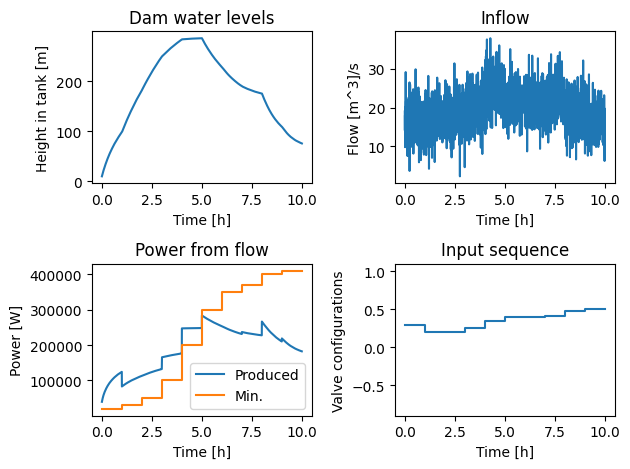

In [17]:
########## USER INPUT ############

# ----------- Task: choose sequence of valve positions (between 0 and 1) -----------
# Insert you sequence of value configurations. You need to specify 10 numbers(= Nd simulations).
u0 = [0.3,0.2,0.2,0.25,0.35,0.4,0.4,0.41,0.48,0.5] # <---- insert here
# u0 = [1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ]



########## SIMULATION (no changes required) ############
# Generate stochastics data solving the system of stochastic differential equations (SDEs).
# We split the total simulation into Nd sub-simulations. The inlet flow is constant in each sub-simulation.
# 10-11-2023

 # Convert Ws to MWh
conv_unit_energy = 2.7778e-10

# Convert seconds to hours
s2h              = 1/(60*60)

u = np.array(u0)

# Initial conditions
x0 = np.array(x0)

# Numpy matrices for storing data
T = np.zeros(Nd*(Nsim))
X = np.zeros(Nd*(Nsim))
Z = np.zeros(Nd*(Nsim))
Y = np.zeros(Nd*(Nsim))
D = np.zeros(Nd*(Nsim))

# Generate stochastic data from a standard Wiener process
(W, Tw, dW) = std_wiener_process((tf-t0), (Nsim+1)*Nd, nW, seed)

# Measurement noise
Rk = 100000 # Maybe we need to change this
vk = np.sqrt(Rk) * np.random.randn(1, Nd*(Nsim))
# Set initial state for each sub-simulation
xk = x0

for i in range(0, Nd):

    # Compute the start and end indices for the current block of simulation data
    start_idx = i * (Nsim)
    end_idx = (i + 1) * (Nsim)

    # Solve the SDE with inflet flow D_det[i] (constant) and with initial condition xk.
    (t, x) = explicitExplicit(driftModel, diffModel, T_det[i], T_det[i+1], xk, u[i], D_det[i], p, dW[:,i * (Nsim+1):(i + 1) * (Nsim+1)], opts)
    # Update initial conditions for next simulation
    xk = x[:,-1]
    
        # Insert simulation data t and x into the corresponding block in T and X
    T[start_idx:end_idx] = t[:-1]
    X[start_idx:end_idx] = x[:, :-1]
    D[start_idx:end_idx] = np.tile(D_det[i], (Nsim)) + sigma*dW[:,i * (Nsim):(i + 1) * (Nsim)][0]
    
    # Generate output sequence (electrical power [W]).
    z = np.zeros((1, Nsim))
    for j in range(0, Nsim):
        z[:,j] = output(t[j], x[:, j], u[i], D_det[i], p)
    Z[start_idx:end_idx] = z
    Y[start_idx:end_idx] = z

# Add measurement noise to Y
Y =  Y + vk[0]

# *** Plot data ***

# Subplot for Tank water levels
ax1 = plt.subplot(2, 2, 1)
plt.plot(T*s2h, X/(rho*A))
plt.ylabel('Height in tank [m]')
plt.xlabel('Time [h]')
plt.title('Dam water levels')

# Subplot for disturbances
ax2 = plt.subplot(2, 2, 2)
plt.plot(T*s2h, D)  # Cumulative energy using np.cumsum
plt.xlabel('Time [h]')
plt.ylabel('Flow [m^3]/s')
plt.title('Inflow')

# Subplot for produced power and minimum required power.
ax3 = plt.subplot(2, 2, 3)
plt.plot(T*s2h, Z, label='Produced')
plt.step(T_det*s2h, np.append(power_goal, power_goal[-1]), where='post', label='Min.')
plt.xlabel('Time [h]')
plt.ylabel('Power [W]')
plt.title('Power from flow')
ax3.legend()

# Subplot for valve configurations
ax4 = plt.subplot(2, 2, 4)
plt.step(T_det*s2h, np.append(u, u[-1]), where='post')  # Cumulative energy using np.cumsum
plt.xlabel('Time [h]')
plt.ylabel('Valve configurations')
plt.ylim([-0.9, 1.1])
plt.title('Input sequence')


# Adjust layout for better spacing
plt.tight_layout()


plt.show()

### 4.b What would it take to turn this into a DT?

### 5. Meeting the demand with MPC (Unfinished).

Meet the minimum required production of power (orange curve) by using an MPC. A sudden distrubance occurs. 

(Evaluation: The student inputs a set of valve settings that is provided by the MPC model after running it.) 

OR

The sudent selects the correct answer from the options.

- A:
- B:
- C:

In [4]:
!python task_c.py

x0 =  25000000.0
2.14176e+08

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:       30
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       30

Total number of variables............................:       21
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       10
                     variables with only upper bounds:        0
Total number of equality constraints.................:       10

### 6. Classification of the model 

How can the model in Part 2 question 5 be categorized? 

- A: Digital model. 
- B: Digital shadow. 
- C: Digital twin. 
- D: None of the above. 

### 7. What’s the advantage of using the MPC as opposed to guessing the valve settings. 
### 8. How does the MPC handle the disturbance?
### 9. Quantative comparison b/w answers from MPC and human. 